
# 프로젝트 : 다양한 OCR모델 비교하기

우리는 지금까지 Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능을 간단히 활용하여 보았습니다.

지금까지 살펴본 바로는 무료로 사용할 수 있는 기능들이지만 모두 준수한 성능을 갖추고 있었습니다. OCR 분야가 이미 실용적인 수준에까지 기술이 발전했기 때문에 이런 것들만 잘 활용해도 실전에 활용할 수 있는 좋은 서비스를 만들어 낼 수 있을것도 같습니다. 그런데 과연 어떤 것을 사용하는 것이 좋을까요?

OCR 기술들이 실용적인 수준까지 꽤 발전했지만 그럼에도 불구하고 아직 완전한 수준은 아닙니다. 용도에 맞게 적절한 것을 선택하는 것도 중요한 일입니다. 그래서 오늘 다뤄본 위 3가지를 검증해 보는 프로젝트를 진행하겠습니다. 여러분은 OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정합니다.

## Step1. 검증용 데이터셋 준비

OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

## Step3. 테스트 결과 정리

모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.


## Step4. 결과 분석과 결론 제시

-   우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
-   여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가기준을 제시합니다.
-   그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.
***

## Step1. 검증용 데이터셋 준비

In [39]:
import os
val_img = ['/home/aiffel/ocr_python/val_img/1.jpeg',
           '/home/aiffel/ocr_python/val_img/2.jpeg',
            '/home/aiffel/ocr_python/val_img/3.jpeg',
            '/home/aiffel/ocr_python/val_img/4.jpeg',
            '/home/aiffel/ocr_python/val_img/5.png',
            '/home/aiffel/ocr_python/val_img/6.jpg',
            '/home/aiffel/ocr_python/val_img/7.jpg',
            '/home/aiffel/ocr_python/val_img/8.jpeg',
            '/home/aiffel/ocr_python/val_img/9.jpeg',
            #'/home/aiffel/ocr_python/val_img/10.jpeg',
            #'/home/aiffel/ocr_python/val_img/11.jpeg',
            '/home/aiffel/ocr_python/val_img/12.jpeg',
            '/home/aiffel/ocr_python/val_img/13.jpeg',
            '/home/aiffel/ocr_python/val_img/14.jpeg',
            '/home/aiffel/ocr_python/val_img/15.jpeg'
            ]
val_img

['/home/aiffel/ocr_python/val_img/1.jpeg',
 '/home/aiffel/ocr_python/val_img/2.jpeg',
 '/home/aiffel/ocr_python/val_img/3.jpeg',
 '/home/aiffel/ocr_python/val_img/4.jpeg',
 '/home/aiffel/ocr_python/val_img/5.png',
 '/home/aiffel/ocr_python/val_img/6.jpg',
 '/home/aiffel/ocr_python/val_img/7.jpg',
 '/home/aiffel/ocr_python/val_img/8.jpeg',
 '/home/aiffel/ocr_python/val_img/9.jpeg',
 '/home/aiffel/ocr_python/val_img/12.jpeg',
 '/home/aiffel/ocr_python/val_img/13.jpeg',
 '/home/aiffel/ocr_python/val_img/14.jpeg']

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

In [2]:
# ocr api

def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [3]:
# keras-ocr

import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()
images = [keras_ocr.tools.read(path) for path in val_img]
prediction_groups = [pipeline.recognize([path]) for path in val_img]

Looking for /home/aiffel/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel/.keras-ocr/crnn_kurapan.h5


In [41]:
# tesseract

import pytesseract
from PIL import Image
from pytesseract import Output

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
        
        
    return cropped_image_path_list


for i in val_img :
    crop_word_regions(i)

./output/0000.png
./output/0001.png
./output/0002.png
./output/0003.png
./output/0004.png
./output/0005.png
./output/0000.png
./output/0001.png
./output/0002.png
./output/0003.png
./output/0004.png
./output/0005.png
./output/0006.png
./output/0007.png
./output/0008.png
./output/0009.png
./output/0010.png
./output/0011.png
./output/0012.png
./output/0013.png
./output/0014.png
./output/0015.png
./output/0016.png
./output/0017.png
./output/0018.png
./output/0019.png
./output/0020.png
./output/0021.png
./output/0022.png
./output/0023.png
./output/0024.png
./output/0025.png
./output/0000.png
./output/0001.png
./output/0002.png
./output/0000.png
./output/0001.png
./output/0002.png
./output/0003.png
./output/0004.png
./output/0000.png
./output/0000.png
./output/0001.png
./output/0002.png
./output/0003.png
./output/0004.png
./output/0005.png
./output/0000.png
./output/0001.png
./output/0002.png
./output/0003.png
./output/0000.png
./output/0001.png
./output/0002.png
./output/0000.png
./output/0

## Step3. 테스트 결과 정리

In [5]:
# ocr api
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.

for i in val_img :
    detect_text(i)

# # 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
# detect_text(path)

-rw-rw-r-- 1 aiffel aiffel 2346  3월 11 10:10 /home/aiffel/ocr_python/my_google_api_key.json
Texts:

"950회
2021년 02월 13일
19
3,281,920,500원
총 8개임 당첨
3 4 15 22 28 40 + 10
"

"950"

"회"

"2021"

"년"

"02"

"월"

"13"

"일"

"19"

"3,281,920,500"

"원"

"총"

"8"

"개임"

"당첨"

"3"

"4"

"15"

"22"

"28"

"40"

"+"

"10"
bounds: (381,88),(396,88),(396,99),(381,99)
Texts:

"로또검색
1037회차 로또 당첨번호 ①
2022.10.15 추천 지금기한 1년
6 15 29 35 42 +7
당청금 정보는 시~9시30분 사이
업대이드 예정입니다
당첨판매점
OR코드확인
방송사간 토요일 오후 8시 45분 MBC
판매시간 토요일 오전 6시~오후 8시
일~금요일 오전 6시~자정까지
관련 당첨변호통계
"

"로또"

"검색"

"1037"

"회차"

"로또"

"당첨"

"번호"

"①"

"2022.10.15"

"추천"

"지금"

"기한"

"1"

"년"

"6"

"15"

"29"

"35"

"42"

"+7"

"당청"

"금"

"정보"

"는"

"시"

"~"

"9"

"시"

"30"

"분"

"사이"

"업대"

"이드"

"예정"

"입니다"

"당첨"

"판매점"

"OR"

"코드"

"확인"

"방송사"

"간"

"토요일"

"오후"

"8"

"시"

"45"

"분"

"MBC"

"판매"

"시간"

"토요일"

"오전"

"6"

"시"

"~"

"오후"

"8"

"시"

"일"

"~"

"금요일"

"오전"

"6"

"시"

"~"

"자정"

"까지"

"관련"

"당첨"

"변호"

"통계"
bounds: (55,205),(67,205),(67,211)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


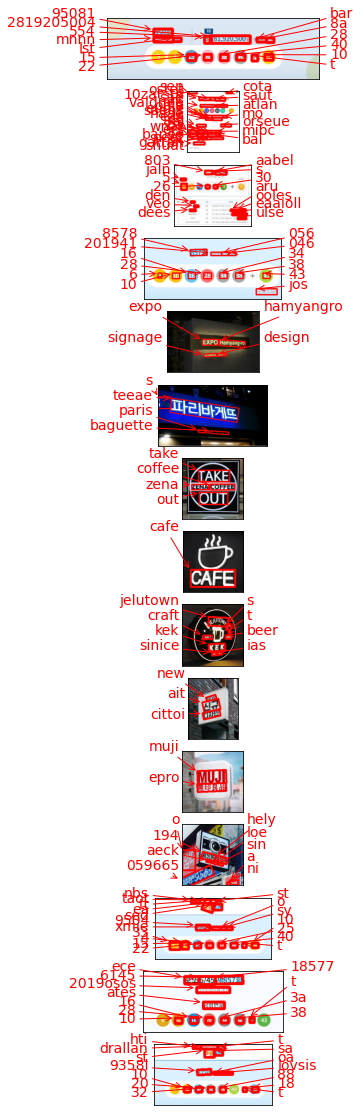

In [6]:
# keras_ocr 시각화

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## Step4. 결과 분석과 결론 제시

1. 구글의 OCR 정확도 및 인식률이 가장 높았고, 그 다음으로 케라스, 태서래트 순서로 성능의 우수성을 보이고 있다.
2. 특히 태서래트의 인식률이 너무 낮아 안되는 이미지가 2개나 있었다.
3. 또한 모든 모델이 정확하게 문자를 인식하거나, 인식한 문자가 정확히 일치하지는 않은 것을 볼 수 있었다.